In [37]:
import numpy as np
import pandas as pd

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Read the 'heart.csv' file into a pandas dataframe named 'data'
data = pd.read_csv('heart.csv')

# Display the first 5 rows of the dataframe 'data'
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
# Split data into training and testing sets (features & target)
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1),  # Features (data without target column)
    data['target'],                # Target variable
    test_size=0.25,                 # Split 25% for testing
    random_state=13               # Ensure reproducible split
)

# Print shapes of training and testing data (rows, columns)
print(X_train.shape, X_test.shape)

(227, 13) (76, 13)


In [40]:
# Create an SGDClassifier object with the following parameters:
#  * max_iter: Maximum number of iterations for training (set to 1000)
#  * learning_rate: Learning rate strategy ('optimal' for automatic selection)
#  * eta0: Initial learning rate (set to 0.1)
#  * random_state: Seed for random number generation (set to 13 for reproducibility)
#  * alpha: L2 regularization parameter (set to 0.1 to control model complexity)
#  * penalty: Type of regularization ('l1' for L1 regularization that encourages sparsity)
#  * loss: Loss function for classification ('log_loss' for logistic regression)
clf = SGDClassifier(max_iter=1000, learning_rate='optimal', eta0=0.1, random_state=13, alpha=0.1, penalty='l1', loss='log_loss')

# Train the classifier on the training data (X_train) with corresponding labels (y_train)
clf.fit(X_train, y_train)

# Use the trained classifier to predict labels (y_pred) for the unseen test data (X_test)
y_pred = clf.predict(X_test)

# Calculate the accuracy score (percentage of correct predictions) on the test data
accuracy = accuracy_score(y_test, y_pred)

# Round the accuracy score to two decimal places and print the result
print('Accuracy:', round(accuracy * 100, 2), '%')

Accuracy: 76.32 %


In [41]:
# Calculate the confusion matrix.
confusion_matrix(y_test, y_pred)

array([[25,  8],
       [10, 33]], dtype=int64)

In [42]:
# Calculate the precision
print('Precision:', round(precision_score(y_test, y_pred), 2), '%')

Precision: 0.8 %


In [43]:
# Calculate the recall
print('Recall:', round(recall_score(y_test, y_pred), 2), '%')

Recall: 0.77 %


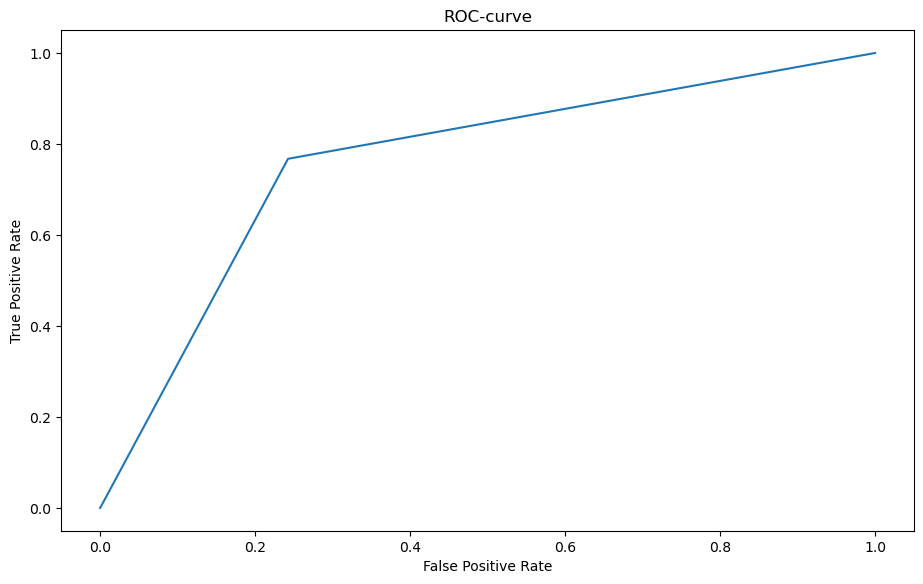

In [51]:
# This line calculates False Positive Rate (fpr), True Positive Rate (tpr), 
# and decision thresholds based on the true labels (y_t) and predicted labels (y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Create a figure with a specific size (11 inches wide, 6.5 inches high)
plt.figure(figsize=(11, 6.5))

# Plot the ROC curve using fpr and tpr values
plt.plot(fpr, tpr)

# Set the title of the plot to 'ROC-curve'
plt.title('ROC-curve')

# Label the x-axis as 'False Positive Rate'
plt.xlabel('False Positive Rate')

# Label the y-axis as 'True Positive Rate'
plt.ylabel('True Positive Rate')

# Display the plot
plt.show()

In [48]:
# Calculate the ROC AUC Score
print('ROC AUC Score:', round(roc_auc_score(y_test, y_pred), 2), '%')

ROC AUC Score: 0.76 %
